# IMPORT MODULES

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
#from keras.models import load_model
import keras.backend as k1
from sklearn.model_selection import train_test_split
from skimage.io import imread,imshow
from skimage.transform import resize
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D,Convolution2D,AveragePooling2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121,DenseNet169

#from keras.applications.densenet import preprocess_input
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from glob import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [56]:
devices = tf.config.list_physical_devices('GPU')

# Data Read

In [18]:
path='Augmentation/'
l=glob(path+"*")
s=len(glob(path+"*"))
print(l)

['Augmentation\\Healthy1', 'Augmentation\\Unhealthy2']


# Data Extraction

In [19]:
path='Augmentation/'
l=glob(path+"*")
s=len(glob(path+"*"))
extract=[]
name_items=[]
for i in l:
    name_items.append(i[13:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob(path+j+"/*")
    for h in m:
        s = cv2.imread(h, cv2.IMREAD_COLOR) 
        try:      
            s= cv2.resize(s, (224,224))
            s= cv2.cvtColor(s, cv2.COLOR_BGR2RGB)
        except:
          break
        extract.append([np.array(s),j])
print(len(extract))
ex=extract

['Healthy1', 'Unhealthy2']
5688


# Split Features and Classes

In [21]:
x=[]
y=[]
for features,class_value in extract:
    x.append(features)
    y.append(class_value)
x=np.array(x)
y=np.array(y)
x=x.reshape(x.shape[0],224,224,3)
print(x.shape)


(5688, 224, 224, 3)


## Make Stationary

In [22]:
x=x/255.0

# Encoding

In [23]:
lb=LabelEncoder()
y=to_categorical(lb.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Session Starts

In [24]:
# input layer (224,224,3) have dim 224X224 and 3 color channels(RGB)
# output layer is of shape (2,) as 2 classes are present 
print(x.shape,y.shape)
k1.clear_session()

(5688, 224, 224, 3) (5688, 2)


# Spliting Data

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
y_test.shape

(1707, 2)

# VGG16

In [26]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split

# Load pre-trained VGG16 model without top layer
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model with VGG16 as base and add new top layers
my_vgg_model = Sequential()
my_vgg_model.add(vgg_model)
my_vgg_model.add(Flatten())
my_vgg_model.add(Dense(256, activation='relu'))
my_vgg_model.add(Dense(128, activation='relu'))
my_vgg_model.add(Dense(2, activation='softmax'))

# Compile the model
my_vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train The Model

In [30]:
hist = my_vgg_model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=20, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/20
125/125 [==============================] - 664s 5s/step - loss: 0.6111 - accuracy: 0.7428 - val_loss: 0.4677 - val_accuracy: 0.7657
Epoch 2/20
125/125 [==============================] - 659s 5s/step - loss: 0.2893 - accuracy: 0.8812 - val_loss: 0.3568 - val_accuracy: 0.8471
Epoch 3/20
125/125 [==============================] - 658s 5s/step - loss: 0.1748 - accuracy: 0.9314 - val_loss: 0.2806 - val_accuracy: 0.8946
Epoch 4/20
125/125 [==============================] - 660s 5s/step - loss: 0.1203 - accuracy: 0.9563 - val_loss: 0.2671 - val_accuracy: 0.8963
Epoch 5/20
125/125 [==============================] - 657s 5s/step - loss: 0.0779 - accuracy: 0.9764 - val_loss: 0.2747 - val_accuracy: 0.9092
Epoch 6/20
125/125 [==============================] - 657s 5s/step - loss: 0.0828 - accuracy: 0.9699 - val_loss: 0.3480 - val_accuracy: 0.8905
Epoch 7/20
125/125 [==============================] - 673s 5s/step - loss: 0.0551 - accuracy: 0.9814 - val_loss: 0.3867 - val_accuracy: 0.8864

# Histogram

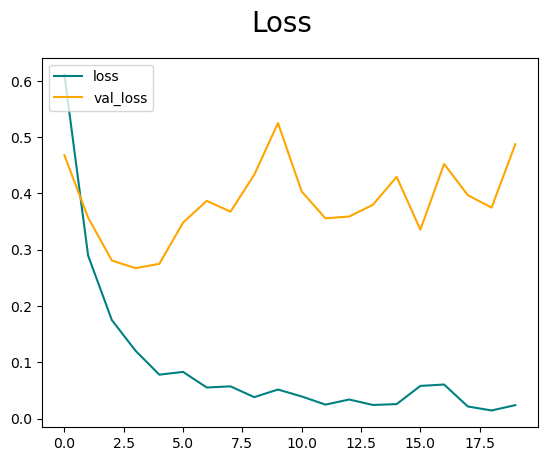

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

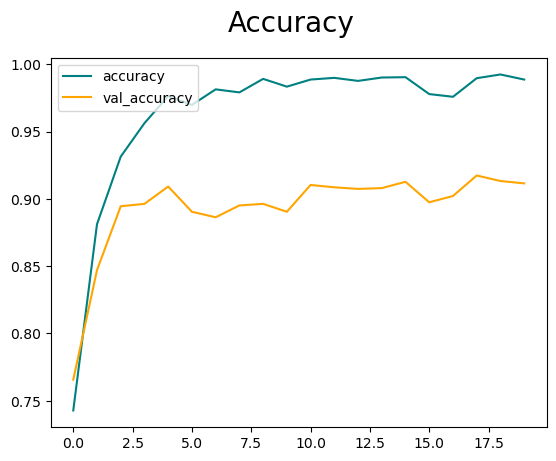

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# TESTING

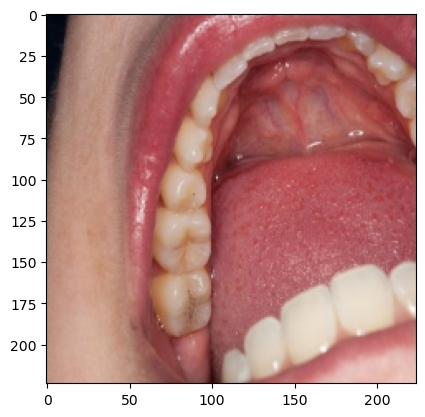

1/1 [==============================] - 0s 139ms/step
Predicted class: 0
[[9.9999976e-01 2.3539873e-07]]
Predicted class: Healthy


In [60]:
import numpy as np
import cv2
import tensorflow as tf

# load image
img = cv2.imread('b.jpg',cv2.IMREAD_COLOR)  
# plt.imshow(img)
# plt.show()

# resize image
 
img= cv2.resize(img, (224,224))
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

         
plt.imshow(img)
plt.show()

# make a prediction on the image
pred = my_vgg_model.predict(np.expand_dims(img/255, 0))
print('Predicted class:', np.argmax(pred))
print(pred)
# Print the predicted class label
if(np.argmax(pred) < 0.5):
  print('Predicted class: Healthy')
else:
  print('Predicted class: Unhealthy')